<a href="https://colab.research.google.com/github/prashant-gulati/portfolio/blob/main/self_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Without trainable weights

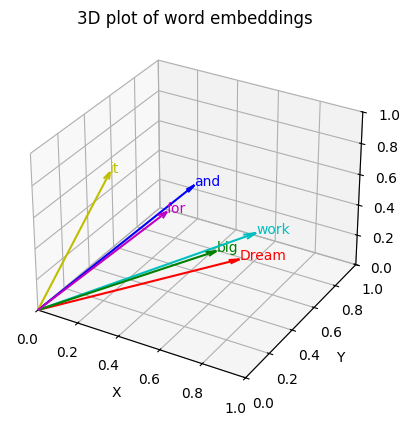

In [40]:
import torch

#vector embeddings, potentially derived from word2vec NN
inputs = torch.tensor(
    [
        [0.72, 0.45, 0.31], #Dream (x^1)
        [0.75, 0.20, 0.55], #big (x^2)
        [0.30, 0.80, 0.40], #and (x^3)
        [0.85, 0.35, 0.60], #work (x^4)
        [0.55, 0.15, 0.75], #for (x^5)
        [0.25, 0.20, 0.85] #it (x^6)
    ]
)

#words
words = ['Dream','big','and','work','for','it']

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#extract coordinates
x_coords = inputs[:,0].numpy()
y_coords = inputs[:,1].numpy()
z_coords = inputs[:,2].numpy()

#3D plot with vectors from origin
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r','g','b','c','m','y']

for(x,y,z,word,color) in zip(x_coords,y_coords,z_coords,words, colors):
  ax.quiver(0,0,0,x,y,z,color=color, arrow_length_ratio=0.05)
  ax.text(x,y,z,word,fontsize=10, color=color)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.title('3D plot of word embeddings')
plt.show()

In [41]:
#magnitude of each vector
magnitudes = torch.norm(inputs, dim=1)

print("magnitudes: ")
for word, magnitude in zip(words, magnitudes):
  print(f"{word}: {magnitude.item():.4f}")

magnitudes: 
Dream: 0.9039
big: 0.9513
and: 0.9434
work: 1.0977
for: 0.9421
it: 0.9083


In [42]:
query = inputs[1]

attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
  attn_scores_2[i] = torch.dot(x_i, query)

print(attn_scores_2)

tensor([0.8005, 0.9050, 0.6050, 1.0375, 0.8550, 0.6950])


In [43]:
import torch.nn.functional as F

# Apply softmax using PyTorch
attn_weights_2 = F.softmax(attn_scores_2, dim=0)

print("Attention weights: ", attn_weights_2.numpy())
print("Sum:", attn_weights_2.numpy().sum())

Attention weights:  [0.16244562 0.18033989 0.13359906 0.20589025 0.1715446  0.14618066]
Sum: 1.0000001


In [44]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.8170, 0.8005, 0.7000, 0.9555, 0.6960, 0.5335],
        [0.8005, 0.9050, 0.6050, 1.0375, 0.8550, 0.6950],
        [0.7000, 0.6050, 0.8900, 0.7750, 0.5850, 0.5750],
        [0.9555, 1.0375, 0.7750, 1.2050, 0.9700, 0.7925],
        [0.6960, 0.8550, 0.5850, 0.9700, 0.8875, 0.8050],
        [0.5335, 0.6950, 0.5750, 0.7925, 0.8050, 0.8250]])


In [45]:
attn_weights = torch.softmax(attn_scores, dim=1)
print(attn_weights)

tensor([[0.1766, 0.1738, 0.1571, 0.2029, 0.1565, 0.1330],
        [0.1624, 0.1803, 0.1336, 0.2059, 0.1715, 0.1462],
        [0.1675, 0.1523, 0.2025, 0.1805, 0.1493, 0.1478],
        [0.1648, 0.1789, 0.1376, 0.2115, 0.1672, 0.1400],
        [0.1491, 0.1747, 0.1334, 0.1960, 0.1805, 0.1662],
        [0.1396, 0.1641, 0.1455, 0.1809, 0.1831, 0.1868]])


In [46]:
all_context_vectors = attn_weights @ inputs
print(all_context_vectors)

tensor([[0.5965, 0.3611, 0.5654],
        [0.5982, 0.3431, 0.5794],
        [0.5681, 0.3830, 0.5627],
        [0.6008, 0.3471, 0.5758],
        [0.5859, 0.3377, 0.5900],
        [0.5684, 0.3402, 0.5964]])


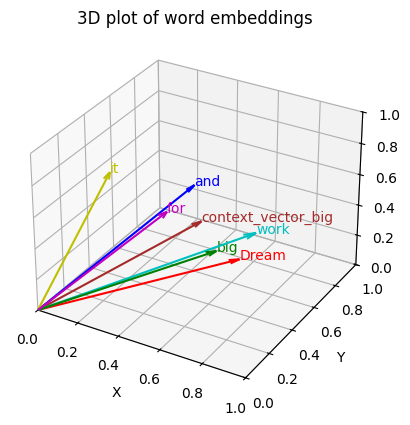

In [47]:
context_vector_2 = all_context_vectors[1]

inputs_2 = torch.cat((inputs, context_vector_2.unsqueeze(0)), dim=0)

words.append('context_vector_big')

#extract coordinates
x_coords = inputs_2[:,0].numpy()
y_coords = inputs_2[:,1].numpy()
z_coords = inputs_2[:,2].numpy()

#3D plot with vectors from origin
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r','g','b','c','m','y', 'brown']

for(x,y,z,word,color) in zip(x_coords,y_coords,z_coords,words, colors):
  ax.quiver(0,0,0,x,y,z,color=color, arrow_length_ratio=0.05)
  ax.text(x,y,z,word,fontsize=10, color=color)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.title('3D plot of word embeddings')
plt.show()

##With trainable weights

In [48]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2
print (x_2)
print (d_in)
print (d_out)

tensor([0.7500, 0.2000, 0.5500])
3
2


In [49]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

print(W_query)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])


In [50]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value

print(query_2)
print(key_2)
print(value_2)

tensor([0.3131, 1.0017])
tensor([0.3126, 0.6001])
tensor([0.1852, 0.6829])


In [51]:
queries = inputs @ W_query
keys = inputs @ W_key
values = inputs @ W_value

print(queries.shape)
print(keys.shape)
print(values.shape)

print(queries)
print(keys)
print(values)

torch.Size([6, 2])
torch.Size([6, 2])
torch.Size([6, 2])
tensor([[0.3494, 0.9504],
        [0.3131, 1.0017],
        [0.3198, 1.0524],
        [0.3842, 1.2000],
        [0.2561, 1.0373],
        [0.1872, 1.0034]])
tensor([[0.2789, 0.6137],
        [0.3126, 0.6001],
        [0.3143, 0.8867],
        [0.3697, 0.7536],
        [0.3392, 0.6807],
        [0.3389, 0.7549]])
tensor([[0.2336, 0.5789],
        [0.1852, 0.6829],
        [0.3232, 0.7113],
        [0.2462, 0.8042],
        [0.1780, 0.7890],
        [0.1830, 0.8328]])


In [52]:
keys_2=keys[1]
attn_score_22=query_2.dot(keys_2)
print(attn_score_22)

tensor(0.6990)


In [53]:
attn_scores_2 = query_2 @keys.T
print(attn_scores_2)

tensor([0.7021, 0.6990, 0.9867, 0.8707, 0.7880, 0.8624])


In [54]:
attn_scores = queries @keys.T
print(attn_scores)

tensor([[0.6807, 0.6795, 0.9526, 0.8454, 0.7654, 0.8359],
        [0.7021, 0.6990, 0.9867, 0.8707, 0.7880, 0.8624],
        [0.7350, 0.7315, 1.0337, 0.9113, 0.8248, 0.9029],
        [0.8436, 0.8402, 1.1848, 1.0464, 0.9471, 1.0361],
        [0.7080, 0.7025, 1.0003, 0.8764, 0.7929, 0.8699],
        [0.6680, 0.6606, 0.9486, 0.8254, 0.7465, 0.8210]])


In [55]:
print(attn_scores_2)
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k ** 0.5, dim=-1)
print(attn_weights_2)
print(d_k)

tensor([0.7021, 0.6990, 0.9867, 0.8707, 0.7880, 0.8624])
tensor([0.1531, 0.1528, 0.1873, 0.1725, 0.1627, 0.1715])
2


In [56]:
#attn_scores = queries @ keys.T

attn_weights = torch.softmax(attn_scores / (d_k ** 0.5), dim=-1)
print(attn_weights)

tensor([[0.1536, 0.1534, 0.1861, 0.1725, 0.1630, 0.1714],
        [0.1531, 0.1528, 0.1873, 0.1725, 0.1627, 0.1715],
        [0.1525, 0.1521, 0.1884, 0.1728, 0.1625, 0.1717],
        [0.1505, 0.1501, 0.1915, 0.1737, 0.1619, 0.1724],
        [0.1530, 0.1524, 0.1881, 0.1724, 0.1625, 0.1716],
        [0.1538, 0.1530, 0.1875, 0.1719, 0.1625, 0.1713]])


In [57]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.2274, 0.7362])


In [58]:
context_vec = attn_weights @values
print(context_vec)

tensor([[0.2273, 0.7361],
        [0.2274, 0.7362],
        [0.2276, 0.7363],
        [0.2280, 0.7368],
        [0.2275, 0.7362],
        [0.2275, 0.7360]])


In [59]:
import torch.nn as nn

class SelfAttention_v2(nn.Module):

  def __init__(self, d_in, d_out, qkv_bias=False):
    super().__init__()
    self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

  def forward(self, x):
    queries = self.W_query(x)
    keys = self.W_key(x)
    values = self.W_value(x)

    attn_scores = queries @keys.T
    attn_weights = torch.softmax(attn_scores/ keys.shape[-1]**0.5, dim=-1)

    context_vec = attn_weights @values
    return context_vec

In [60]:
d_in = inputs.shape[1]
d_out = 2

torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0184,  0.1495],
        [-0.0180,  0.1502],
        [-0.0183,  0.1495],
        [-0.0178,  0.1505],
        [-0.0177,  0.1506],
        [-0.0177,  0.1507]], grad_fn=<MmBackward0>)


In [61]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @keys.T
attn_weights = torch.softmax(attn_scores/ keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[0.1582, 0.1729, 0.1456, 0.1732, 0.1771, 0.1730],
        [0.1590, 0.1739, 0.1444, 0.1738, 0.1771, 0.1718],
        [0.1568, 0.1734, 0.1433, 0.1739, 0.1785, 0.1741],
        [0.1570, 0.1750, 0.1403, 0.1751, 0.1793, 0.1732],
        [0.1594, 0.1745, 0.1435, 0.1742, 0.1772, 0.1711],
        [0.1600, 0.1744, 0.1441, 0.1741, 0.1767, 0.1707]],
       grad_fn=<SoftmaxBackward0>)


##Causal attention

In [62]:
context_length = inputs.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [63]:
masked_simple = attn_weights * mask_simple
print(masked_simple)

tensor([[0.1582, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1590, 0.1739, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1568, 0.1734, 0.1433, 0.0000, 0.0000, 0.0000],
        [0.1570, 0.1750, 0.1403, 0.1751, 0.0000, 0.0000],
        [0.1594, 0.1745, 0.1435, 0.1742, 0.1772, 0.0000],
        [0.1600, 0.1744, 0.1441, 0.1741, 0.1767, 0.1707]],
       grad_fn=<MulBackward0>)


In [64]:
row_sums = masked_simple.sum(dim=1, keepdim=True)
print(row_sums.shape)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

torch.Size([6, 1])
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4777, 0.5223, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3312, 0.3662, 0.3026, 0.0000, 0.0000, 0.0000],
        [0.2425, 0.2703, 0.2167, 0.2704, 0.0000, 0.0000],
        [0.1923, 0.2105, 0.1732, 0.2102, 0.2138, 0.0000],
        [0.1600, 0.1744, 0.1441, 0.1741, 0.1767, 0.1707]],
       grad_fn=<DivBackward0>)


In [65]:
print(attn_scores)

tensor([[ 0.1278,  0.2536,  0.0104,  0.2559,  0.2873,  0.2540],
        [ 0.1236,  0.2499, -0.0124,  0.2494,  0.2758,  0.2329],
        [ 0.1458,  0.2882,  0.0182,  0.2916,  0.3285,  0.2934],
        [ 0.1517,  0.3052, -0.0074,  0.3055,  0.3393,  0.2904],
        [ 0.1222,  0.2499, -0.0263,  0.2477,  0.2714,  0.2224],
        [ 0.1160,  0.2386, -0.0314,  0.2357,  0.2571,  0.2075]],
       grad_fn=<MmBackward0>)


In [66]:
mask=torch.triu(torch.ones(context_length, context_length), diagonal=1)
print(mask)
attn_scores = attn_scores/(2**0.5)
masked=attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])
tensor([[ 0.0904,    -inf,    -inf,    -inf,    -inf,    -inf],
        [ 0.0874,  0.1767,    -inf,    -inf,    -inf,    -inf],
        [ 0.1031,  0.2038,  0.0129,    -inf,    -inf,    -inf],
        [ 0.1073,  0.2158, -0.0053,  0.2160,    -inf,    -inf],
        [ 0.0864,  0.1767, -0.0186,  0.1751,  0.1919,    -inf],
        [ 0.0820,  0.1687, -0.0222,  0.1667,  0.1818,  0.1467]],
       grad_fn=<MaskedFillBackward0>)


In [67]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4842, 0.5158, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3320, 0.3565, 0.3115, 0.0000, 0.0000, 0.0000],
        [0.2449, 0.2644, 0.2262, 0.2645, 0.0000, 0.0000],
        [0.1947, 0.2075, 0.1808, 0.2073, 0.2098, 0.0000],
        [0.1620, 0.1722, 0.1505, 0.1720, 0.1738, 0.1696]],
       grad_fn=<SoftmaxBackward0>)


In [68]:
example = torch.ones(context_length, context_length)
print(example)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])


In [69]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6,6)
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [70]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.6640, 0.7130, 0.6230, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5289, 0.4524, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4150, 0.0000, 0.4146, 0.0000, 0.0000],
        [0.0000, 0.3444, 0.3009, 0.3439, 0.3476, 0.0000]],
       grad_fn=<MulBackward0>)


##Multi-head attention

In [71]:
class CausalAttention(nn.Module):

  def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
    super().__init__()
    self.d_out = d_out
    self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.dropout = nn.Dropout(dropout)
    self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))

  def forward(self, x):
    b, num_tokens, d_in = x.shape

    keys = self.W_key(x)
    queries = self.W_query(x)
    values = self.W_value(x)

    attn_scores = queries @ keys.transpose(1,2)
    attn_scores.masked_fill_(
        self.mask.bool()[:num_tokens, :num_tokens], -torch.inf
    )
    attn_weights = torch.softmax(
        attn_scores / (keys.shape[-1] ** 0.5), dim=-1
    )
    attn_weights = self.dropout(attn_weights)

    context_vec = attn_weights @ values
    return context_vec

In [72]:
d_in = inputs.shape[-1]
d_out = 2
print(d_in, d_out)

3 2


In [73]:
batch = torch.stack((inputs,inputs,), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [74]:
class MultiHeadAttentionWrapper(nn.Module):
  def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
    super().__init__()
    self.heads= nn.ModuleList(
        [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
        for _ in range(num_heads)]
    )

  def forward(self, x):
    return torch.cat([head(x) for head in self.heads], dim=-1)

In [75]:
torch.manual_seed(123)
context_length = batch.shape[1]
d_in, d_out = 3,2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=4)

In [76]:
context_vecs = mha(batch)
print(context_vecs)
print(context_vecs.shape)

tensor([[[-0.5762, -0.1627,  0.5569,  0.3635,  0.5928,  0.2207, -0.3000,
           0.5321],
         [-0.5650, -0.0630,  0.5599,  0.3006,  0.5806,  0.2327, -0.3637,
           0.5146],
         [-0.5472, -0.1226,  0.5285,  0.3435,  0.5612,  0.2336, -0.3496,
           0.5499],
         [-0.5787, -0.0943,  0.5621,  0.3388,  0.5932,  0.2477, -0.3812,
           0.5682],
         [-0.5593, -0.0436,  0.5509,  0.3046,  0.5711,  0.2495, -0.4075,
           0.5516],
         [-0.5287, -0.0033,  0.5277,  0.2743,  0.5374,  0.2492, -0.4281,
           0.5372]],

        [[-0.5762, -0.1627,  0.5569,  0.3635,  0.5928,  0.2207, -0.3000,
           0.5321],
         [-0.5650, -0.0630,  0.5599,  0.3006,  0.5806,  0.2327, -0.3637,
           0.5146],
         [-0.5472, -0.1226,  0.5285,  0.3435,  0.5612,  0.2336, -0.3496,
           0.5499],
         [-0.5787, -0.0943,  0.5621,  0.3388,  0.5932,  0.2477, -0.3812,
           0.5682],
         [-0.5593, -0.0436,  0.5509,  0.3046,  0.5711,  0.2495, -0.4